# COGS 108 - Video Game Sales Final Project

# Overview

Our group sought out to find the relationship between three different regions(North America, Europe, and Japan) and their preferences in types of video games using a video game sales data. We initially supposed that the genre of the video game would dictate how well games would sell in different regions. Consequently, we hypothesized that Action and Sports games would lead to higher sales in North America and Europe, while role-playing games would lead to higher sales in Japan. Nonetheless, as we delved deeper into the dateset, we found out that not only were there distinct genre differences across regions, but the Publisher of the game also played a significant role in the success of the game. We also took a deep dive into the years 2008 and 2009 because those years were the two most successful years in terms of video game sales.

# Names

- Andrew Fellowes
- Vanessa Keodara
- Ruben Chan
- Soyeon Kim
- Justin Nwanagu

<a id='research_question'></a>
# Research Question

What are the factors that contribute to the success of video game sales across the regions of North America, Europe, and Japan?


<a id='background'></a>

## Background & Prior Work

While there may have been stigma surrounding its origins, video games have largely become an accessible and widely popular medium of entertainment. Early franchises such as Tetris (1984)  and Donkey Kong (1981)  paved the way for more modern advances in the form of virtual reality and AI technology. With such a vast array of games that have been developed over the years, consumers have likewise developed their own personal preferences (Thorne et al. 2014, Cable TV 2017). Preference in specific categories of games giveaway to entire genres, there are many popular genres to consider, such as: action, sports, role-playing, strategy, adventure, etc. (Straits 2020). Since their inception, the 1950s, video games have become a favorite pastime to many and the industry behind it has risen significantly as an economic powerhouse (Sidak 2006). For our research, we are interested to see if there are potential relationships between certain regions and preferences in types of video games, such as different genres, platforms, and publishers. For example, it would be important to consider a genre’s target audience, and how that may impact overall sales. Something that may sell very well in Japan for instance, may not demonstrate the same appeal overseas and we want to see if there is data to support this conjecture. Identifying correlations in regional preference of video game genres could prove beneficial for the effectiveness of marketing and advertising as well as overall predicted sales. 
 
References (include links):
- 1)https://www.cabletv.com/blog/popular-video-games-world-map/
- 2)https://straitsresearch.com/blog/top-10-most-popular-gaming-genres-in-2020/

# Hypothesis


We hypothesize that genre will have the greatest effect on the success of video game sales and that most of the Japan sales will be towards role-playing based games, while North America and Europe sales will be predominantly action or sports games.


# Dataset(s)

- Dataset Name: Video Game Sales
- Link to the dataset: https://www.kaggle.com/gregorut/videogamesales
- Number of observations: 16,598

The Video Game Sales dataset on Kaggle was organized nicely into 11 different columns that started from the top selling game in descending order. There are 16,598 records, however 2 were dropped due to incomplete information. This contains information from games since 1980 to 2016. It shows data from North America, Europe, and Japan. Total combined amount of sales in this dataset would be considered Global Sales. Each video game shows us the sales from the respective region, the platform it was published on, the year, genre, and publisher. 

# Setup

After downloading our dataset from Kaggle, we decided to use popular data science related libraries such as numpy, pandas for data organization; matplotlib and seaborn for data visualization.

In [1]:
# imports - these are the imports needed for the assignment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["xtick.labelsize"] = 10

# the Video Game Sales csv file from Kaggle
df = pd.read_csv('vgsales.csv')

In [2]:
# check the data
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Data Cleaning

The dataset had 9 columns of detailed information regarding thousands of game titles, but to make our data leaner, we only kept the columns that were of interest to us. 

- **Rank:** Rank of the video games in regards to most sales (Number 1 being the most sold).
- **Name:** Name of the video game title.
- **Platform:** The video game console that the game was published on.
- **Year:** The year the video game was published.
- **Genre:** The genre that the video game falls under. 
- **Publisher:** The publishing company that made the video game.
- **NA_Sales:** Number of copies sold (in millions) in the North American region.
- **EU_Sales:** Number of copies sold (in millions) in the Europe region.
- **JP_Sales:** Number of copies sold (in millions) in the Japan region.
- **Other_Sales:** Number of copies sold (in millions) in all the other regions in the world.
- **Global_Sales:** Number of copies sold (in millions) in all the regions combined. 


However, we decided to drop two columns. 
- Dropped **'Rank'** because we felt that the column had the same information as **‘Global_Sales’**. We are also not necessarily concerned with the particular global ranking of a game, but primarily how well it sold regionally.
- Dropped **'Other_Sales'** because the column contains a vague information and we think we cannot accurately portray the span of this category. We do not know how this column is broken down as well. It could be one country dominating these sales or perhaps more. It is unknown to us how many countries are represented in this column. 
- Dropped rows with any null data ( e.g., games without a year provided)


In [3]:
# drop 'Rank'
df = df.drop('Rank', axis=1)

# drop 'Other_Sales'
df = df.drop('Other_Sales', axis=1)

# drop Years in 'Year' column with lack of data
years_drop = df['Year'].isin([2017,2020])
df = df[~years_drop]

# changing the Genre 'Platform' to 'Platformer' for clarity against console platform
df[df['Genre'] == 'Platform'] = df[df['Genre'] == 'Platform'].replace('Platform','Platformer')

# dropping any Null entries
df = df.dropna()

# creating separate dataframes to further examine particular years, and other variables of interest
df_1981 = pd.DataFrame(df.query('Year == 1981'))
df_1984 = pd.DataFrame(df.query('Year == 1984'))
df_1985 = pd.DataFrame(df.query('Year == 1985'))
df_1986 = pd.DataFrame(df.query('Year == 1986'))
df_1987 = pd.DataFrame(df.query('Year == 1987'))
df_1988 = pd.DataFrame(df.query('Year == 1988'))
df_1993 = pd.DataFrame(df.query('Year == 1993'))
df_1996 = pd.DataFrame(df.query('Year == 1996'))
df_1999 = pd.DataFrame(df.query('Year == 1999'))
df_2006 = pd.DataFrame(df.query('Year == 2006'))
df_2008 = pd.DataFrame(df.query('Year == 2008'))
df_2009 = pd.DataFrame(df.query('Year == 2009'))
df_2013 = pd.DataFrame(df.query('Year == 2013'))
df_2014 = pd.DataFrame(df.query('Year == 2014'))
df_2015 = pd.DataFrame(df.query('Year == 2015'))
df_2016 = pd.DataFrame(df.query('Year == 2016'))
df_Nintendo = pd.DataFrame(df.query('Publisher == "Nintendo"'))

In [4]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Super Mario Bros.,NES,1985.0,Platformer,Nintendo,29.08,3.58,6.81,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,31.37


# Data Analysis & Results

We used the describe() function from pandas to do that to get an overview of the entire dataset.

In [5]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Global_Sales
count,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000
mean,2006.402775,0.265695,0.147768,0.078849,0.541022
std,5.830382,0.822525,0.509360,0.311916,1.567520
min,1980.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.480000
max,2016.000000,41.490000,29.020000,10.220000,82.740000


Based on the information above, there are 16,291 observations and there are no partially filled in observations. Also, by looking at the year column, we can see that the earliest data entry is in 1980 and the latest data entry is from 2017. Looking at all the means of the different columns, North America, on average, sells the most units followed by Europe and then Japan. It's also imprtant to note that out of the three, North America also has the highest standard deviation, which means that even though on average America buys the most units, there is a lot more variation than the other regions. It's also interesting to note that the highest selling game in Japan(10 million units) is around only 1/4 of the units sold for the game that sold the best in America(41 million units). Now, let's take a look at what these top-selling games were by region.

In [6]:
top_JP = df[['Name', 'Year', 'Genre', 'Publisher', 'JP_Sales']].sort_values(by=['JP_Sales'], ascending=False).reset_index(drop=True)
top_EU = df[['Name', 'Year', 'Genre', 'Publisher', 'EU_Sales']].sort_values(by=['EU_Sales'], ascending=False).reset_index(drop=True)
top_NA = df[['Name', 'Year', 'Genre', 'Publisher', 'NA_Sales']].sort_values(by=['NA_Sales'], ascending=False).reset_index(drop=True)
top_JP.index = top_JP.index + 1
top_EU.index = top_EU.index + 1
top_NA.index = top_NA.index + 1

print('Top Five Sales in North America')
display(top_NA.head())
print('Top Five Sales in Europe')
display(top_EU.head())
print('Top Five Sales in Japan')
display(top_JP.head())

Top Five Sales in North America


,Name,Year,Genre,Publisher,NA_Sales
1,Wii Sports,2006.0,Sports,Nintendo,41.49
2,Super Mario Bros.,1985.0,Platformer,Nintendo,29.08
3,Duck Hunt,1984.0,Shooter,Nintendo,26.93
4,Tetris,1989.0,Puzzle,Nintendo,23.20
5,Mario Kart Wii,2008.0,Racing,Nintendo,15.85


Top Five Sales in Europe


,Name,Year,Genre,Publisher,EU_Sales
1,Wii Sports,2006.0,Sports,Nintendo,29.02
2,Mario Kart Wii,2008.0,Racing,Nintendo,12.88
3,Wii Sports Resort,2009.0,Sports,Nintendo,11.01
4,Nintendogs,2005.0,Simulation,Nintendo,11.00
5,Grand Theft Auto V,2013.0,Action,Take-Two Interactive,9.27


Top Five Sales in Japan


,Name,Year,Genre,Publisher,JP_Sales
1,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,10.22
2,Pokemon Gold/Pokemon Silver,1999.0,Role-Playing,Nintendo,7.20
3,Super Mario Bros.,1985.0,Platformer,Nintendo,6.81
4,New Super Mario Bros.,2006.0,Platformer,Nintendo,6.50
5,Pokemon Diamond/Pokemon Pearl,2006.0,Role-Playing,Nintendo,6.04


The above tables breakdown the "top five" total sales of games across each of our regions of interest: North America, Europe, and Japan. For the purpose of our central question, it is significant to note the lack of any real overlap in top selling games when comparing region. Observing Japan in particular, three of its top five are role-playing games which no other region appears to have -- adding to that they all belong to the Pokemon game series. When comparing Europe with North America, there is more overlap with each containing "Wii Sports" at the top and "Mario Kart Wii" in different positions, but aside from these two games, there is no real comparison.

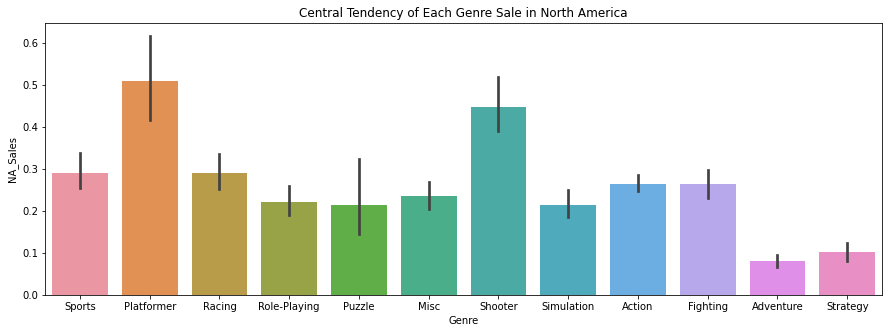

In [7]:
ax_na = sns.barplot(x="Genre", y="NA_Sales", data=df).set_title("Central Tendency of Each Genre Sale in North America")

The graph above shows the estimate of central tendency of the sales of each game genre in North America, along with error bars. We created this plot to see the most profitable game genre is independent of the number of units sold. Interestingly, the number of units sold did not correpond to the mean sales of each genre. Although action had the highest unit sold, platform had the highest mean sales based on the graph depicting mean sales of each genre in North America.

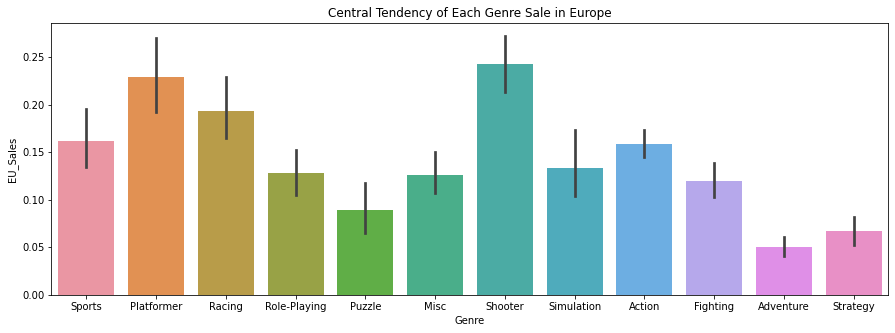

In [8]:
ax_eu = sns.barplot(x="Genre", y="EU_Sales", data=df).set_title("Central Tendency of Each Genre Sale in Europe")

The graph above is another barplot depicting the estimate of central tendency of the sales of each game genre in Europe. Although action had the highest units sold, shooter was the genre with the highest mean sales.

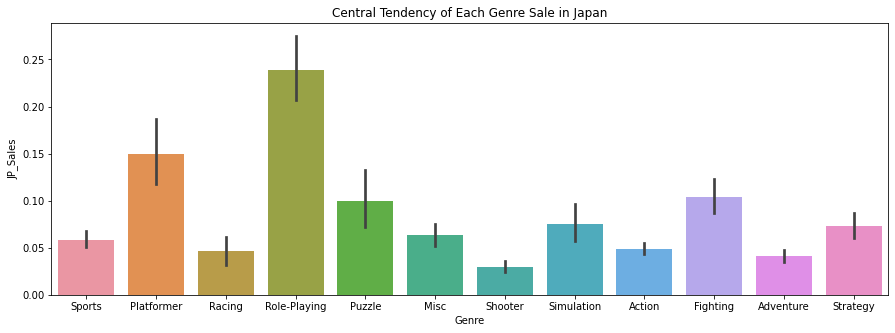

In [9]:
ax_jp = sns.barplot(x="Genre", y="JP_Sales", data=df).set_title("Central Tendency of Each Genre Sale in Japan")

The graph above is another barplot depicting the estimate of central tendency of the sales of each game genre in Japan. As opposed to the North American mean sale graph and the European mean sale graph where the top-sold genre and the highest mean sale genre did not correspond, the the Japanese graph had the same top-selling genre and the highest mean sale of that genre, which was role playing. We also thought it would be important to look at total sales of each genre by each region.

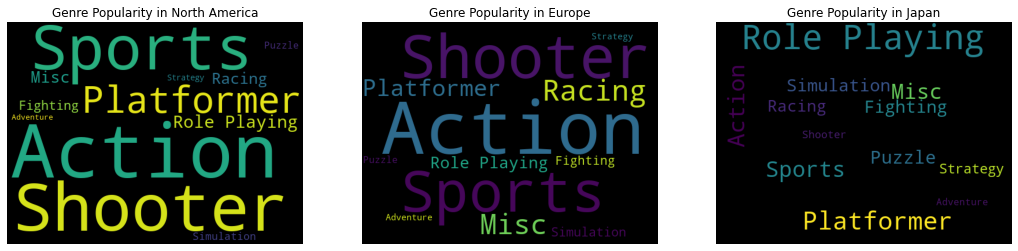

In [10]:
_, axs = plt.subplots(1, 3, figsize=(18, 18))
jp_sales = df.sort_values(by="JP_Sales", ascending=False)
data = jp_sales.head(500)['Genre']
jp_sales_wordcloud = WordCloud(background_color="black", width=512, height=384).generate(" ".join(data))

na_sales = df.sort_values(by="NA_Sales", ascending=False)
data = na_sales.head(500)['Genre']
na_sales_wordcloud = WordCloud(background_color="black", width=512, height=384).generate(" ".join(data))

eu_sales = df.sort_values(by="EU_Sales", ascending=False)
data = eu_sales.head(500)['Genre']
eu_sales_wordcloud = WordCloud(background_color="black", width=512, height=384).generate(" ".join(data))

clouds = {'Genre Popularity in North America': na_sales_wordcloud, 'Genre Popularity in Europe': eu_sales_wordcloud, 'Genre Popularity in Japan': jp_sales_wordcloud}
for ind, k in enumerate(clouds):
    _ = axs[ind].title.set_text(k)
    _ = axs[ind].axis("off")
    _ = axs[ind].imshow(clouds.get(k))

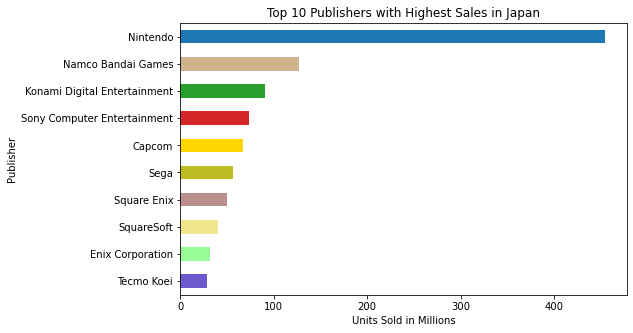

In [11]:
d=df.groupby(by = 'Publisher')['JP_Sales'].sum().sort_values(ascending=False).head(10)
colors = ['C0', 'tan', 'C2', 'C3', 'gold','C8','rosybrown','khaki','palegreen','slateblue']
ax = d.plot.barh(figsize=(8,5),color=colors)
ax.invert_yaxis()
title = plt.title('Top 10 Publishers with Highest Sales in Japan')
label = plt.xlabel('Units Sold in Millions')

We wanted to find out top publishers with highest sales in each region. The graph above depicts the top 10 publishers with highest sales in Japan. Interestingly, all of these publishers are Japanese publishers, which implies that Japanese game players tend to play games produced by Japanese publishers or that Japanese publishers tend to target Japanese consumers.

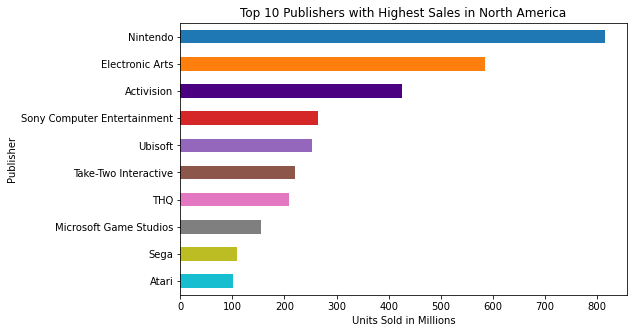

In [12]:
d=df.groupby(by = 'Publisher')['NA_Sales'].sum().sort_values(ascending=False).head(10)
colors=['C0', 'C1', 'indigo', 'C3', 'C4','C5','C6','C7','C8','C9']
ax = d.plot.barh(figsize=(8,5),color=colors)
ax.invert_yaxis()
title = plt.title('Top 10 Publishers with Highest Sales in North America')
label = plt.xlabel('Units Sold in Millions')

Next, we plotted the top 10 publishers with highest sales in North Ameria. When broken down by the publisher's nationality, there are 5 American publishers(Electronic Art, Activision, Take-Two Interactive, THQ, and Microsoft Game Studios), 4 Japanses publishers(Nintendo, Sony Computer Entertainment, Sega, and Atari), and 1 European publisher(Ubisoft). 

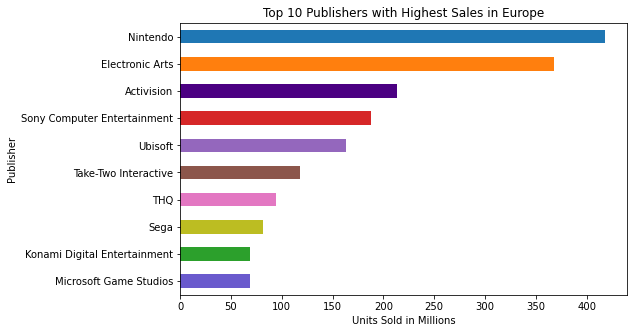

In [13]:
d=df.groupby(by = 'Publisher')['EU_Sales'].sum().sort_values(ascending=False).head(10)
colors=['C0', 'C1', 'indigo', 'C3', 'C4','C5','C6','C8','C2','slateblue']
ax = d.plot.barh(figsize=(8,5),color=colors)
ax.invert_yaxis()
title = plt.title('Top 10 Publishers with Highest Sales in Europe')
label = plt.xlabel('Units Sold in Millions')

Lastly, the figure above depicts the top 10 publisher with highest sales in Europe. When broken down by the publisher's nationality, there are 5 American publishers(Electronic Art, Activision, Take-Two Interactive, THQ, and Microsoft Game Studios), 4 Japanses publishers(Nintendo, Sony Computer Entertainment, Sega, and Atari), and 1 European publisher(Ubisoft), which was identical breakdown as the North America data. 

Overall, Nintendo produced the highest sale across all three regions, which leads us to hypothesize that whether a game is published by Nintendo or not would be a predicting factor of how well that game will be sold across all three regions. Aside from that, from these graphs we learned that Japanese consumers tend to purchase games published by Japanese publishers, whereas Americans and Europeans purchase games published by both American and Japanese publishers in similar degree.

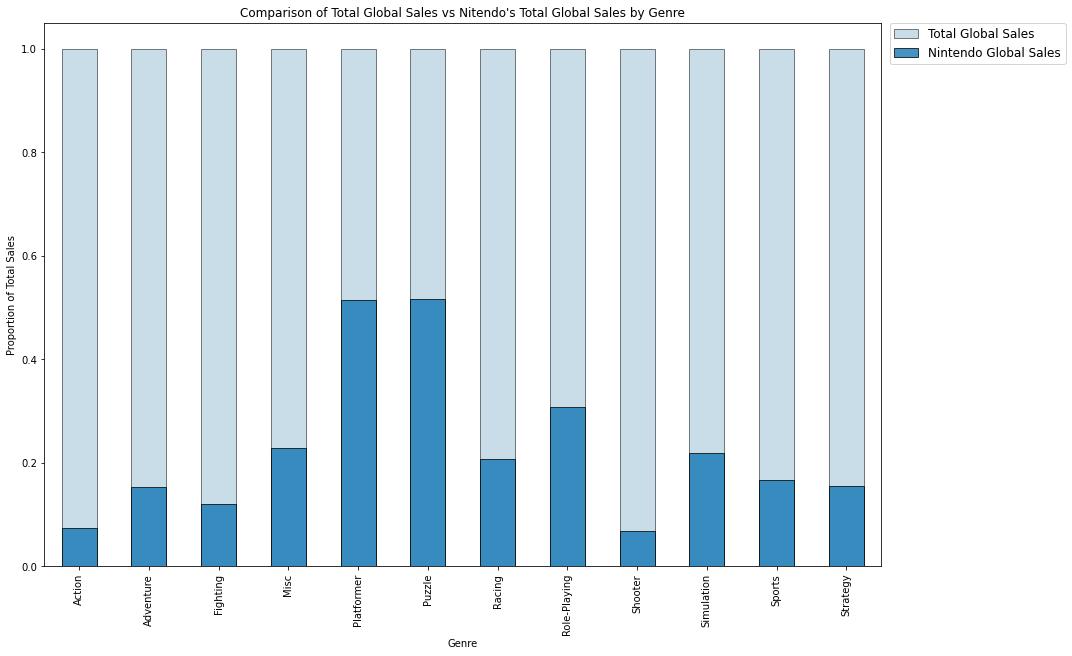

In [14]:
ax = (df.groupby(by='Genre')['Global_Sales'].sum()/df.groupby(by='Genre')['Global_Sales'].sum()).plot.bar(stacked=True,color = '#95bcd4', alpha=0.5,edgecolor='black')
ax_1 = (df_Nintendo.groupby(by='Genre')['Global_Sales'].sum()/df.groupby(by='Genre')['Global_Sales'].sum()).plot.bar(stacked=True,color = '#0870b0', alpha=.75,edgecolor='black')
fig = plt.gcf()
ax.set_title('Comparison of Total Global Sales vs Nitendo\'s Total Global Sales by Genre')
ax.set_ylabel('Proportion of Total Sales')
fig.set_size_inches (15,10)
ax.legend(['Total Global Sales', 'Nintendo Global Sales'],bbox_to_anchor=(1.01,1), loc=2, borderaxespad=0., fontsize='12')

With Nintendo being a particular publisher of interest, we wanted to get a more comprehensive sense of its impact on global sales. Visualizing it with the stacked barchart above, total global sales versus Nintendo specific global sales, this becomes increasingly clear (darker blue bars represents proportion of sales by Nintendo). Particularly, in the genres of 'Platformer' and 'Puzzle' games, Nintendo published games alone account for a significant amount of the total global sales at roughly 51%. Further, on average Nintendo games' global sales make up about 23% of the total global sales across each genre.

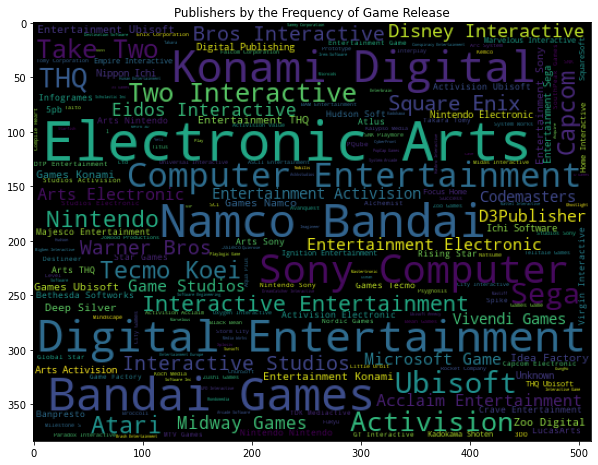

In [44]:
plt.subplots(figsize=(10, 10))
data = df['Publisher']
plt.title('Publishers by the Frequency of Game Release')
wordcloud = WordCloud(background_color="black", width=512, height=384).generate(" ".join(data))
_ = plt.imshow(wordcloud)

Something interesting to note about the above wordcloud is that even though Nintendo dominates top sales, they do not release as many games as other publishers. Thus their relative space on the wordcloud is much smaller comparatively.

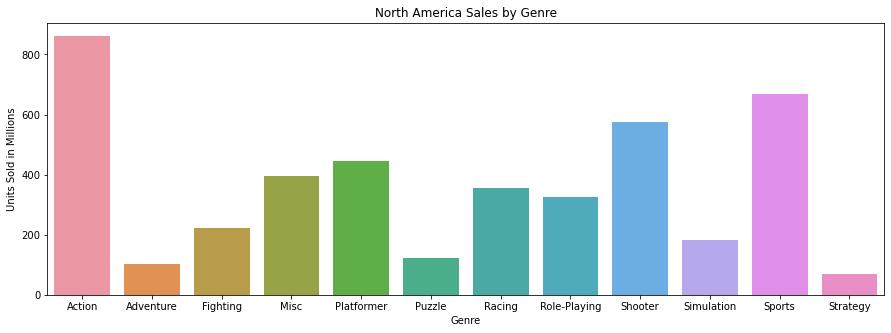

In [16]:
NA_SALES_GROUP = df.groupby(by = 'Genre')['NA_Sales'].sum()
ax = sns.barplot(x=NA_SALES_GROUP.keys(), y=NA_SALES_GROUP.values, data=df).set_title("Central Tendency of Each Genre Sale in North America")
title = plt.title('North America Sales by Genre')
label = plt.ylabel('Units Sold in Millions')

In the above graph, we show another bar chart that describes the amount each genre has sold in America. Looking at the chart, Action games in the U.S. have sold the most with over 800 millions units sold and in second place would be Sports games at around 700 million. The lowest sold genre in the US were strategy games. However, this graph in culmination with the 'Central Tendency of Each Genre Sale in North America' shows that even though Action games in total have the most amount of units sold, on average each game doesn't particularly sell well. This would go to suggest that the number of Action games helps in terms of it being the most profitable genre in the U.S.

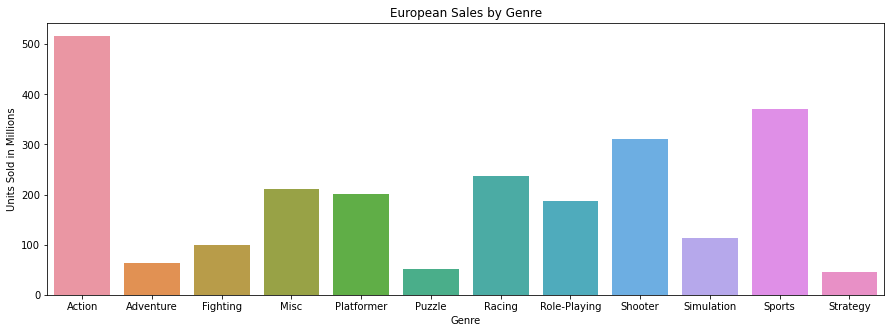

In [17]:
EU_SALES_GROUP = df.groupby(by = 'Genre')['EU_Sales'].sum()
ax = sns.barplot(x=EU_SALES_GROUP.keys(), y=EU_SALES_GROUP.values, data=df).set_title("Central Tendency of Each Genre Sale in North America")
title = plt.title('European Sales by Genre')
label = plt.ylabel('Units Sold in Millions')

The graph above is another bar chart that describes the amount each genre has sold in Europe. The overall trend of each genres' popularity looks very similar to the North American distribution except, every category of game has sold more copies in America in comparison to Europe. Also in Europe, miscellaneous games are more popular than platform games when its the opposite in America.

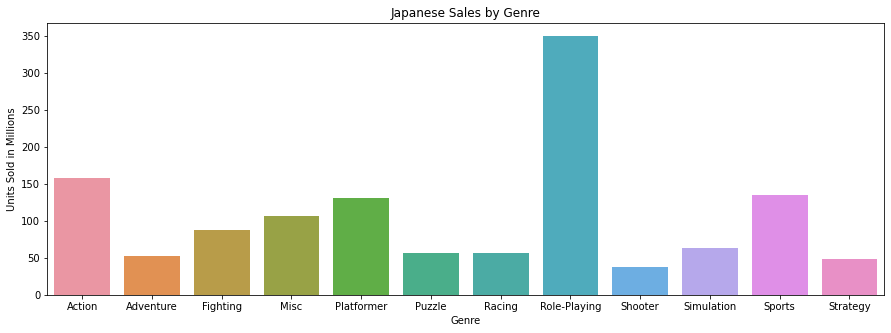

In [18]:
JP_SALES_GROUP = df.groupby(by = 'Genre')['JP_Sales'].sum()
ax = sns.barplot(x=JP_SALES_GROUP.keys(), y=JP_SALES_GROUP.values, data=df).set_title("Central Tendency of Each Genre Sale in North America")
title = plt.title('Japanese Sales by Genre')
label = plt.ylabel('Units Sold in Millions')

The graph above is another bar chart that describes the amount each genre has sold in Japan. Looking at the graph, we can see that in Japan, the most popular game genre is Role-Playing sitting at around 350 million units sold and second place are action games at around 150 million units sold. It's also interesting tho note that the least popular game genre in Japan is the shooting genre, while over in America and Europe, it was the third most popular genre.

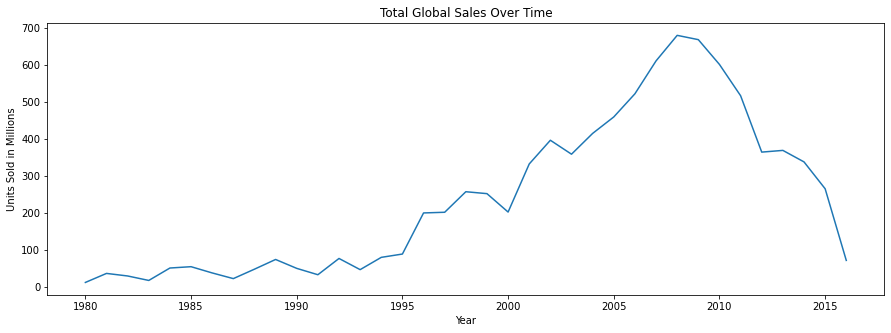

In [19]:
sales_over_time = df.groupby(by='Year')['Global_Sales'].sum()
sns.lineplot(x=sales_over_time.keys(), y=sales_over_time.values)
title = plt.title('Total Global Sales Over Time')
label = plt.ylabel('Units Sold in Millions')


The graph above illustrates the cumulative global sales of videogames throughout the course of our dataset. The progressive increase in copies sold between 1980 and 2010 can likely be observed as the equally increasing appeal of video games as an entertainment medium. Interestingly, however, we hypothesize that the significant decrease following 2010 is a result of physical game copies being exchanged for online downloads, as our dataset expressed sales in physical copies alone and did not account for other means.

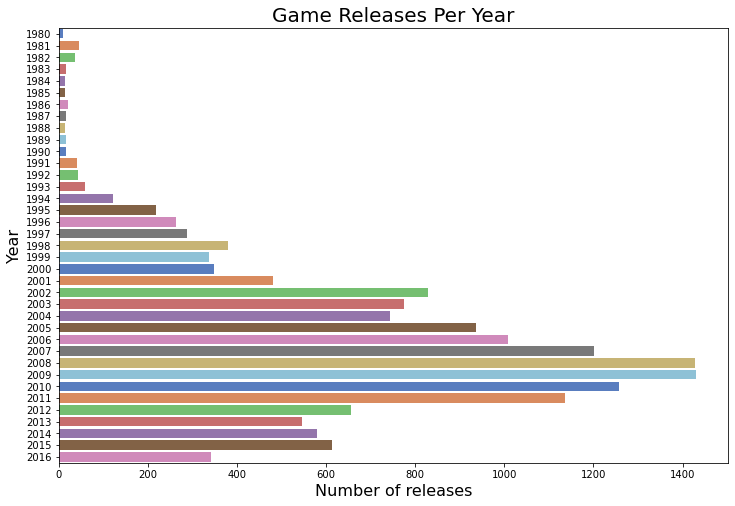

In [20]:
x = df.groupby(['Year']).count()
x = x['Name']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y, x = x, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)

plt.show()

This barplot visualizes the number of game releases per year from 1980 to 2016. As shown, right before 2010 was the peak for game releases. 2008 and 2009 are the years with the highest values. The decline is not as prevalent until we hit 2012.

Text(0, 0.5, 'Units in Millions')

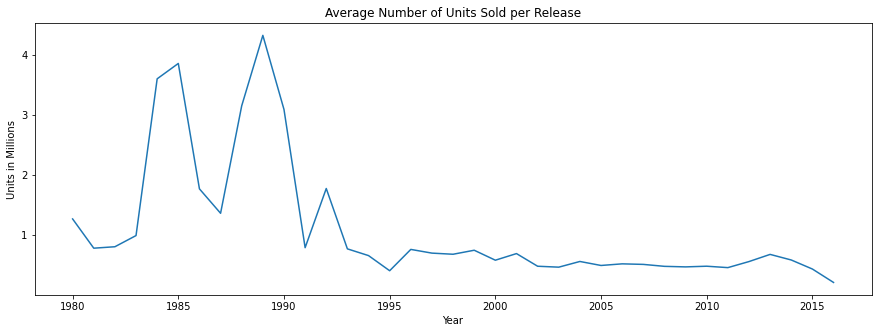

In [21]:
total_sales_per_year = df.groupby('Year').sum()['Global_Sales']
x = df.groupby(['Year'])
releases_per_year = x['Name'].count().values

units_sold_per_release = total_sales_per_year/releases_per_year
_ = sns.lineplot(units_sold_per_release.keys(), units_sold_per_release.values)
_.set_title('Average Number of Units Sold per Release')
_.set_ylabel('Units in Millions')

The line graph above plots the average number of units sold per release in a given year. As would be expected, in recent years with an influx of releases, proportionally the average sales have decreased significantly. 

In [22]:
df_boom = df.loc[(df['Year']>= 2004) & (df['Year'] <= 2009)]
df_decline = df.loc[(df['Year']>= 2010)& (df['Year'] <= 2013)]
df_small_inc = df.loc[(df['Year']> 2013)]
df_peak = df.loc[(df['Year'] == 2009)]

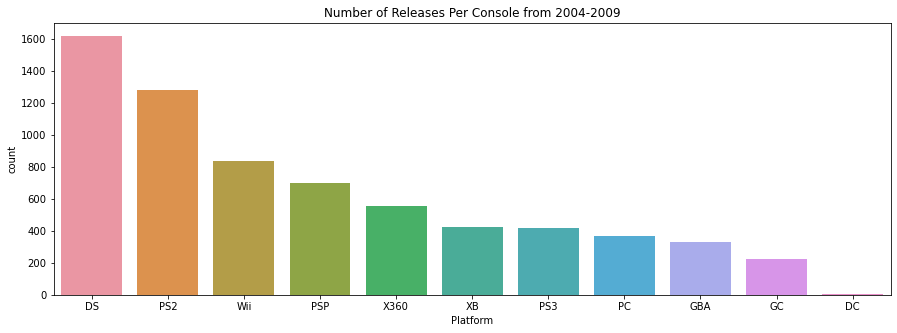

In [23]:
plat_boom = sns.countplot(x="Platform", data=df_boom, order = df_boom['Platform'].value_counts().index).set_title("Number of Releases Per Console from 2004-2009")


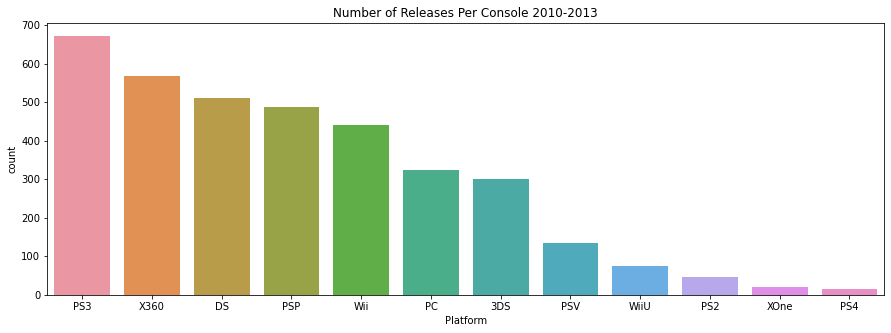

In [24]:
plat_decline = sns.countplot(x="Platform", data=df_decline, order = df_decline['Platform'].value_counts().index).set_title("Number of Releases Per Console 2010-2013")

By looking at the two above graphs, we can see that in 2005-2009, that period increase was marked by the domination of the Nintendo DS. In the 2009-2013 graph, this is when the Xbox 360 and the PS3 were the dominant consoles. This decrease in total gross and number of games released make sense because as attention got shifted from the DS and PS2 to the PS3 and Xbox 360, not only did games become more expensive to make, but the ability to buy games digitally became an option(of which this list doesn’t account for). It also does help that the PS2 and DS are the two highest selling consoles of all time, which could also explain the difference in total gross because of the smaller install base.

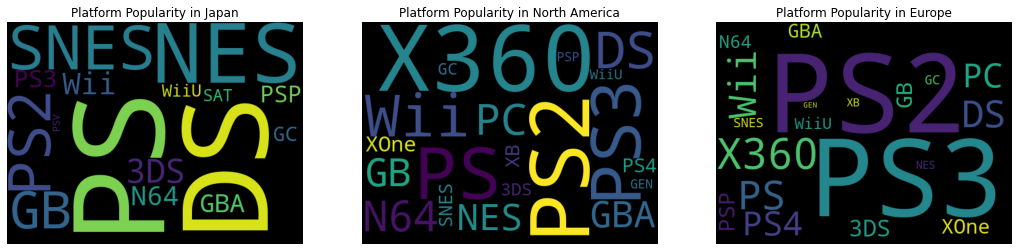

In [25]:
_, axs = plt.subplots(1, 3, figsize=(18, 18))
data = jp_sales.head(500)['Platform']
jp_plat_wordcloud = WordCloud(background_color="black", width=512, height=384).generate(" ".join(data))

data = na_sales.head(500)['Platform']
na_plat_wordcloud = WordCloud(background_color="black", width=512, height=384).generate(" ".join(data))

data = eu_sales.head(500)['Platform']
eu_plat_wordcloud = WordCloud(background_color="black", width=512, height=384).generate(" ".join(data))

clouds = {'Platform Popularity in Japan': jp_plat_wordcloud, 'Platform Popularity in North America': na_plat_wordcloud, 'Platform Popularity in Europe': eu_plat_wordcloud}
for ind, k in enumerate(clouds):
    _ = axs[ind].title.set_text(k)
    _ = axs[ind].axis("off")
    _ = axs[ind].imshow(clouds.get(k))

### EDA Visualizations for Role-Playing Sales

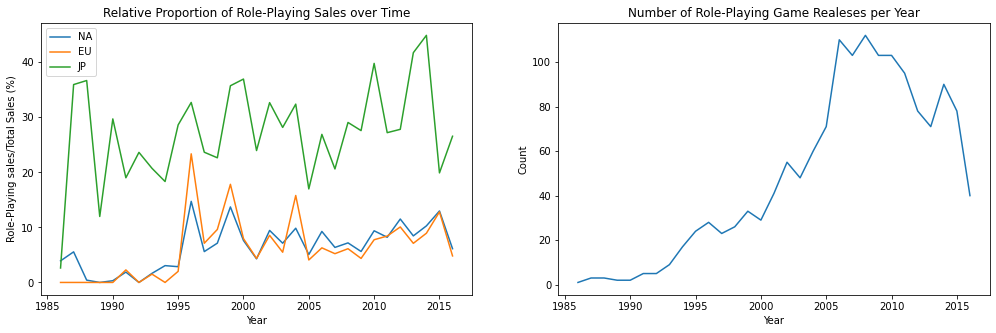

In [26]:
_, axs = plt.subplots(1, 2, figsize=(17, 5))

jp_yr_total_sales = df.groupby('Year')['JP_Sales'].sum()
na_yr_total_sales = df.groupby('Year')['NA_Sales'].sum()
eu_yr_total_sales = df.groupby('Year')['EU_Sales'].sum()

jp_rpg_sales = df[df['Genre'] == 'Role-Playing'].groupby(['Year'])['JP_Sales'].sum()
jp_rpg_perc = (jp_rpg_sales/jp_yr_total_sales)*100
jp_rpg_perc = jp_rpg_perc[~pd.isnull(jp_rpg_perc)]
                          
na_rpg_sales = df[df['Genre'] == 'Role-Playing'].groupby(['Year'])['NA_Sales'].sum()
na_rpg_perc = (na_rpg_sales/na_yr_total_sales)*100
na_rpg_perc = na_rpg_perc[~pd.isnull(na_rpg_perc)]
                          
eu_rpg_sales = df[df['Genre'] == 'Role-Playing'].groupby(['Year'])['EU_Sales'].sum()
eu_rpg_perc = (eu_rpg_sales/eu_yr_total_sales)*100
eu_rpg_perc = eu_rpg_perc[~pd.isnull(eu_rpg_perc)]

_ = axs[0].plot(na_rpg_perc, label='NA')
_ = axs[0].plot(eu_rpg_perc, label='EU')
_ = axs[0].plot(jp_rpg_perc, label='JP')

_ = axs[0].set_xlabel("Year")
_ = axs[0].set_ylabel("Role-Playing sales/Total Sales (%)")
_ = axs[0].legend()
_ = axs[0].set_title('Relative Proportion of Role-Playing Sales over Time')

data = df[df['Genre'] == 'Role-Playing'].groupby(['Year']).count()['Global_Sales']
_ = axs[1].plot(data)
_ = axs[1].set_title('Number of Role-Playing Game Realeses per Year')
_ = axs[1].set_xlabel('Year')
_ = axs[1].set_ylabel('Count')

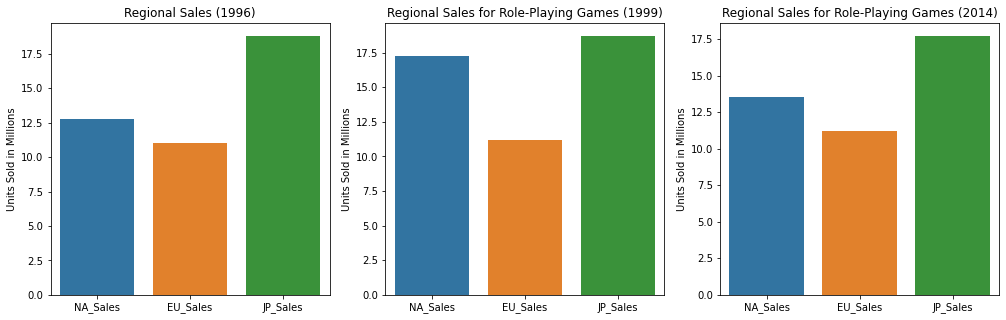

In [27]:
_, axs = plt.subplots(1, 3, figsize=(17, 5))

data = df_1996[df_1996['Genre']=='Role-Playing'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[0].set_title('Regional Sales (1996)')
_ = axs[0].set_ylabel('Units Sold in Millions')
_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[0])

data = df_1999[df_1999['Genre']=='Role-Playing'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[1].set_title('Regional Sales for Role-Playing Games (1999)')
_ = axs[1].set_ylabel('Units Sold in Millions')
_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[1])

data = df_2014[df_2014['Genre']=='Role-Playing'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[2].set_title('Regional Sales for Role-Playing Games (2014)')
_ = axs[2].set_ylabel('Units Sold in Millions')
_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[2])

The above collection of graphs closely examines the sale of Role-Playing games across time for each region. Starting from the top left, this graph breaks down the relative proportion of sales that Role-Playing games made up compared to the total sales for each region in a given year. In other words, what proportion Role-Playing game sales accounted for, for the total of that year. The top right graph simply shows the number of Role-Playing game releases each year. The bottom group of graphs emphasizes particular years of interest found in the sales line graph. The main finding of note here, is that in each graph Japan sales have the lead over the other two regions.  

### EDA Visualizations for Platformer Sales

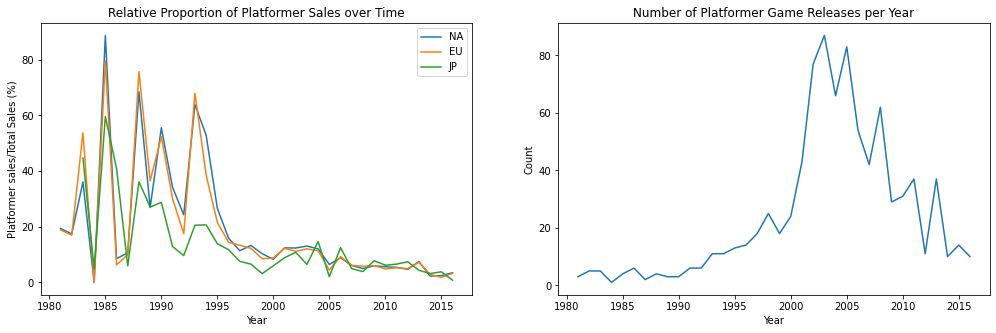

In [28]:
_, axs = plt.subplots(1, 2, figsize=(17, 5))

jp_platformer_sales = df[df['Genre'] == 'Platformer'].groupby(['Year'])['JP_Sales'].sum()
jp_platformer_perc = (jp_platformer_sales/jp_yr_total_sales)*100
jp_platformer_perc = jp_platformer_perc[~pd.isnull(jp_platformer_perc)]
                          
na_platformer_sales = df[df['Genre'] == 'Platformer'].groupby(['Year'])['NA_Sales'].sum()
na_platformer_perc = (na_platformer_sales/na_yr_total_sales)*100
na_platformer_perc = na_platformer_perc[~pd.isnull(na_platformer_perc)]
                          
eu_platformer_sales = df[df['Genre'] == 'Platformer'].groupby(['Year'])['EU_Sales'].sum()
eu_platformer_perc = (eu_platformer_sales/eu_yr_total_sales)*100
eu_platformer_perc = eu_platformer_perc[~pd.isnull(eu_platformer_perc)]

_ = axs[0].plot(na_platformer_perc, label='NA')
_ = axs[0].plot(eu_platformer_perc, label='EU')
_ = axs[0].plot(jp_platformer_perc, label='JP')

_ = axs[0].set_xlabel("Year")
_ = axs[0].set_ylabel("Platformer sales/Total Sales (%)")
_ = axs[0].legend()
_ = axs[0].set_title('Relative Proportion of Platformer Sales over Time')

data = df[df['Genre'] == 'Platformer'].groupby(['Year']).count()['Global_Sales']
_ = axs[1].plot(data)
_ = axs[1].set_title('Number of Platformer Game Releases per Year')
_ = axs[1].set_xlabel("Year")
_ = axs[1].set_ylabel('Count')

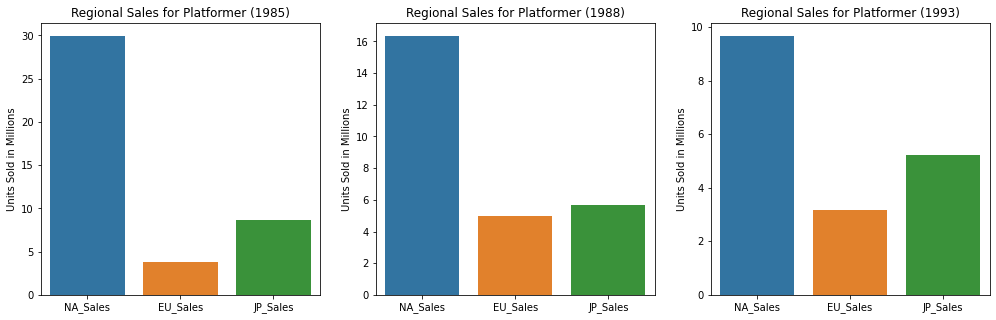

In [29]:
_, axs = plt.subplots(1, 3, figsize=(17, 5))

data = df_1985[df_1985['Genre']=='Platformer'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[0].set_title('Regional Sales for Platformer (1985)')
_ = axs[0].set_ylabel('Units Sold in Millions')
_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[0])

data = df_1988[df_1988['Genre']=='Platformer'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[1].set_title('Regional Sales for Platformer (1988)')
_ = axs[1].set_ylabel('Units Sold in Millions')
_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[1])

data = df_1993[df_1993['Genre']=='Platformer'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[2].set_title('Regional Sales for Platformer (1993)')
_ = axs[2].set_ylabel('Units Sold in Millions')
_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[2])

The above collection of graphs closely examines the sale of Platformer games across time for each region. The top left representing the proportion Platformer game sales accounted for, for the total of that year. The top right graph shows the number of Platformer game releases each year. The bottom group of graphs emphasizes particular years of interest found in the sales line graph. An interesting observation for Platformer games is that in recent years across each region the sales performance appears to have significantly decreased. Platformer games also noted an earlier decrease in releases around 2005 compared to most other genres being around 2010. In terms of regional preference NA sales dominate across the three regions.

### EDA Visualizations for Action Sales

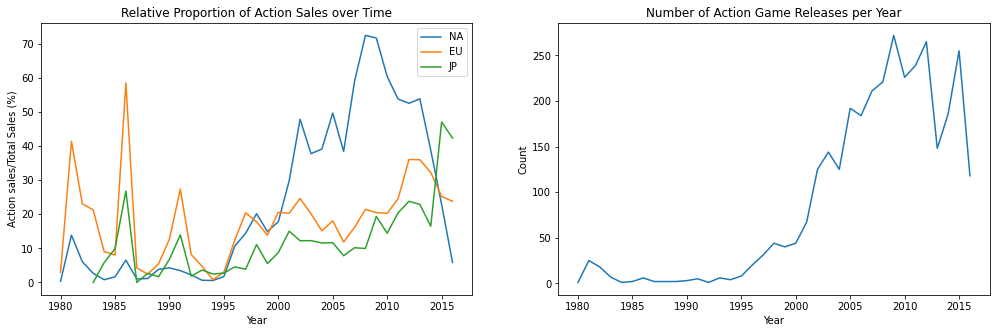

In [30]:
_, axs = plt.subplots(1, 2, figsize=(17, 5))

jp_action_sales = df[df['Genre'] == 'Action'].groupby(['Year'])['JP_Sales'].sum()
jp_action_perc = (jp_action_sales/jp_yr_total_sales)*100
jp_action_perc = jp_action_perc[~pd.isnull(jp_action_perc)]
                          
na_action_sales = df[df['Genre'] == 'Action'].groupby(['Year'])['NA_Sales'].sum()
na_action_perc = (na_action_sales/na_yr_total_sales)*100
na_action_perc = na_action_perc[~pd.isnull(na_action_perc)]
                          
eu_action_sales = df[df['Genre'] == 'Action'].groupby(['Year'])['EU_Sales'].sum()
eu_action_perc = (eu_action_sales/eu_yr_total_sales)*100
eu_action_perc = eu_action_perc[~pd.isnull(eu_action_perc)]

_ = axs[0].plot(na_action_sales, label='NA')
_ = axs[0].plot(eu_action_perc, label='EU')
_ = axs[0].plot(jp_action_perc, label='JP')

_ = axs[0].set_xlabel("Year")
_ = axs[0].set_ylabel("Action sales/Total Sales (%)")
_ = axs[0].legend()
_ = axs[0].set_title('Relative Proportion of Action Sales over Time')

data = df[df['Genre'] == 'Action'].groupby(['Year']).count()['Global_Sales']
_ = axs[1].plot(data)
_ = axs[1].set_title('Number of Action Game Releases per Year')
_ = axs[1].set_xlabel("Year")
_ = axs[1].set_ylabel('Count')

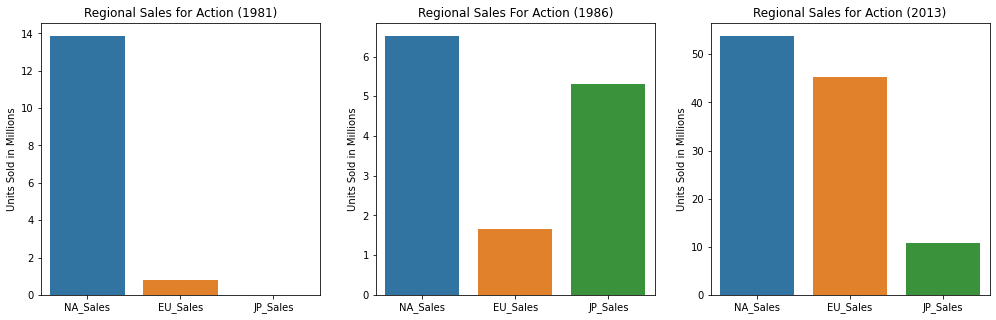

In [31]:
_, axs = plt.subplots(1, 3, figsize=(17, 5))

data = df_1981[df_1981['Genre']=='Action'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[0].set_title('Regional Sales for Action (1981)')
_ = axs[0].set_ylabel('Units Sold in Millions')
_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[0])

data = df_1986[df_1986['Genre']=='Action'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[1].set_title('Regional Sales For Action (1986)')
_ = axs[1].set_ylabel('Units Sold in Millions')
_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[1])

data = df_2013[df_2013['Genre']=='Action'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[2].set_title('Regional Sales for Action (2013)')
_ = axs[2].set_ylabel('Units Sold in Millions')

_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[2])

The above collection of graphs closely examines the sale of Action games across time for each region. The top left representing the proportion Action game sales accounted for, for the total of that year. The top right graph shows the number of Platformer game releases each year. The bottom group of graphs emphasizes particular years of interest found in the sales line graph. An interesting observation for Action games is that their recent proportion of total sales in NA have increased significantly, more than any other genre of game -- however this is not seen across regions. Likewise more action games have been released per year than any other genre in recent years. The years of interest demonstrate gradual increases in total units sold across each region over time.

### EDA Visualizations for Shooter Sales

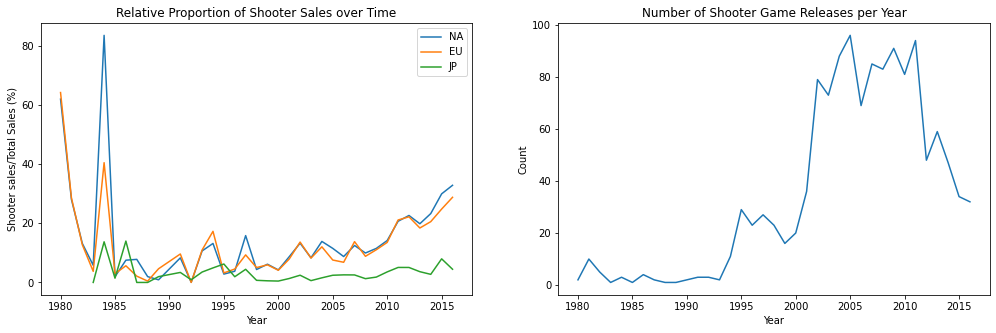

In [32]:
_, axs = plt.subplots(1, 2, figsize=(17, 5))

jp_shooter_sales = df[df['Genre'] == 'Shooter'].groupby(['Year'])['JP_Sales'].sum()
jp_shooter_perc = (jp_shooter_sales/jp_yr_total_sales)*100
jp_shooter_perc = jp_shooter_perc[~pd.isnull(jp_shooter_perc)]
                          
na_shooter_sales = df[df['Genre'] == 'Shooter'].groupby(['Year'])['NA_Sales'].sum()
na_shooter_perc = (na_shooter_sales/na_yr_total_sales)*100
na_shooter_perc = na_shooter_perc[~pd.isnull(na_shooter_perc)]
                          
eu_shooter_sales = df[df['Genre'] == 'Shooter'].groupby(['Year'])['EU_Sales'].sum()
eu_shooter_perc = (eu_shooter_sales/eu_yr_total_sales)*100
eu_shooter_perc = eu_shooter_perc[~pd.isnull(eu_shooter_perc)]

_ = axs[0].plot(na_shooter_perc, label='NA')
_ = axs[0].plot(eu_shooter_perc, label='EU')
_ = axs[0].plot(jp_shooter_perc, label='JP')

_ = axs[0].set_xlabel("Year")
_ = axs[0].set_ylabel("Shooter sales/Total Sales (%)")
_ = axs[0].legend()
_ = axs[0].set_title('Relative Proportion of Shooter Sales over Time')

data = df[df['Genre'] == 'Shooter'].groupby(['Year']).count()['Global_Sales']
_ = axs[1].plot(data)
_ = axs[1].set_title('Number of Shooter Game Releases per Year')
_ = axs[1].set_xlabel("Year")
_ = axs[1].set_ylabel('Count')

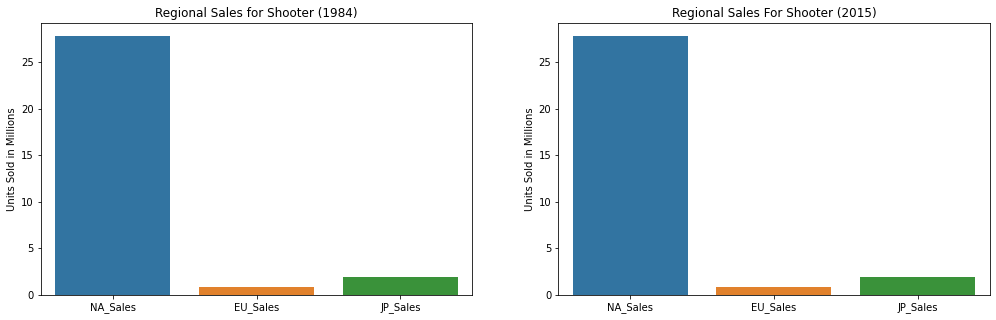

In [33]:
_, axs = plt.subplots(1, 2, figsize=(17, 5))

data = df_1984[df_1984['Genre']=='Shooter'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[0].set_title('Regional Sales for Shooter (1984)')
_ = axs[0].set_ylabel('Units Sold in Millions')
_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[0])

ax=df_2015[df_2015['Genre']=='Shooter'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[1].set_title('Regional Sales For Shooter (2015)')
_ = axs[1].set_ylabel('Units Sold in Millions')
_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[1])

The above collection of graphs closely examines the sale of Shooter games across time for each region. The top left representing the proportion Shooter game sales accounted for, for the total of that year. The top right graph shows the number of Shooter game releases each year. The bottom group of graphs emphasizes particular years of interest found in the sales line graph. The primary finding observing these graphs is the distinct preference for Shooter games in NA specifically. Throughout almost its entire course, Shooter games have sold better in NA than any other region, and the count of regional sales in 1984 and 2015 supports this.

### EDA Visualizations for Sports Sales

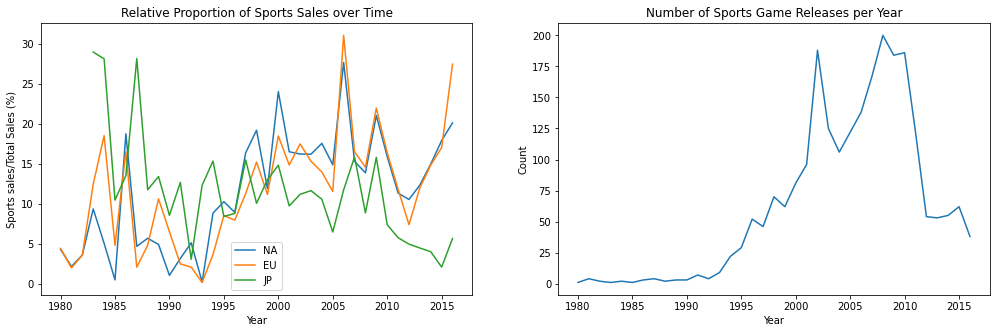

In [34]:
_, axs = plt.subplots(1, 2, figsize=(17, 5))

jp_sport_sales = df[df['Genre'] == 'Sports'].groupby(['Year'])['JP_Sales'].sum()
jp_sport_perc = (jp_sport_sales/jp_yr_total_sales)*100
jp_sport_perc = jp_sport_perc[~pd.isnull(jp_sport_perc)]
                          
na_sport_sales = df[df['Genre'] == 'Sports'].groupby(['Year'])['NA_Sales'].sum()
na_sport_perc = (na_sport_sales/na_yr_total_sales)*100
na_sport_perc = na_sport_perc[~pd.isnull(na_sport_perc)]
                          
eu_sport_sales = df[df['Genre'] == 'Sports'].groupby(['Year'])['EU_Sales'].sum()
eu_sport_perc = (eu_sport_sales/eu_yr_total_sales)*100
eu_sport_perc = eu_sport_perc[~pd.isnull(eu_sport_perc)]

axs[0].plot(na_sport_perc, label='NA')
axs[0].plot(eu_sport_perc, label='EU')
axs[0].plot(jp_sport_perc, label='JP')

_ = axs[0].set_xlabel("Year")
_ = axs[0].set_ylabel("Sports sales/Total Sales (%)")
_ = axs[0].legend()
_ = axs[0].set_title('Relative Proportion of Sports Sales over Time')

data = df[df['Genre'] == 'Sports'].groupby(['Year']).count()['Global_Sales']
_ = axs[1].plot(data)
_ = axs[1].set_title('Number of Sports Game Releases per Year')
_ = axs[1].set_xlabel('Year')
_ = axs[1].set_ylabel('Count')

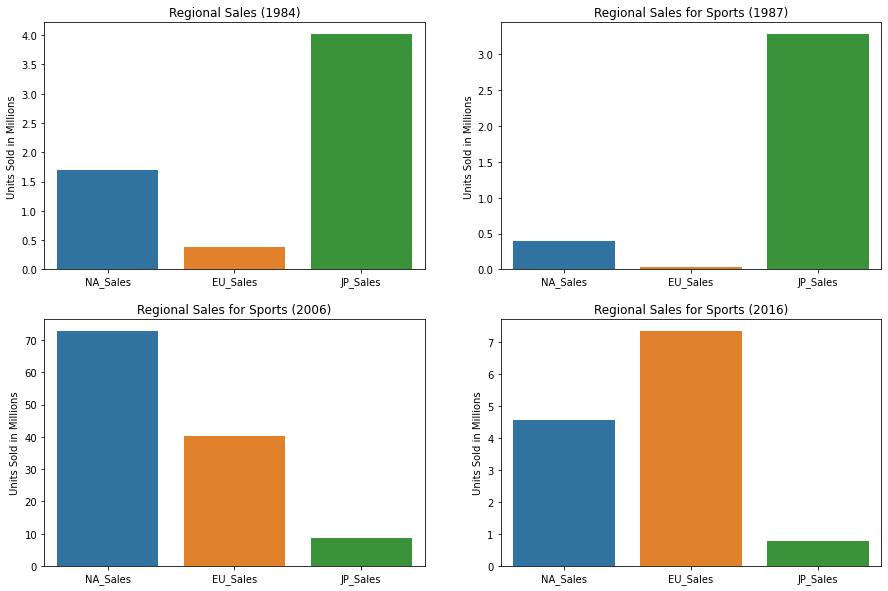

In [35]:
_, axs = plt.subplots(2, 2, figsize=(15, 10))

data = df_1984[df_1984['Genre']=='Sports'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[0, 0].set_title('Regional Sales (1984)')
_ = axs[0, 0].set_ylabel('Units Sold in Millions')
_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[0, 0])

data = df_1987[df_1987['Genre']=='Sports'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[0, 1].set_title('Regional Sales for Sports (1987)')
_ = axs[0, 1].set_ylabel('Units Sold in Millions')
_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[0, 1])

data = df_2006[df_2006['Genre']=='Sports'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[1, 0].set_title('Regional Sales for Sports (2006)')
_ = axs[1, 0].set_ylabel('Units Sold in Millions')
_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[1, 0])


data = df_2016[df_2016['Genre']=='Sports'].groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = axs[1, 1].set_title('Regional Sales for Sports (2016)')
_ = axs[1, 1].set_ylabel('Units Sold in Millions')
_ = sns.barplot(x=data.keys(), y=data.values[0], ax=axs[1, 1])


The above collection of graphs closely examines the sale of Sports games across time for each region. The top left representing the proportion Sports game sales accounted for, for the total of that year. The top right graph shows the number of Sports game releases each year. The bottom group of graphs emphasizes particular years of interest found in the sales line graph. The overall proportion of sales of Sports games demonstrates an interesting change in trends over time, initially being prominent in Japan and favoring NA/EU regions around 2000 and onward. This is further exemplified in the four years extracted, as in 1984 and 1987 there were significantly higher sales in Japan however moving into 2006 and 2016 NA and EU regions respectively far outweighed Japanese sales.

### EDA Visualizations for the Years 2008 and 2009

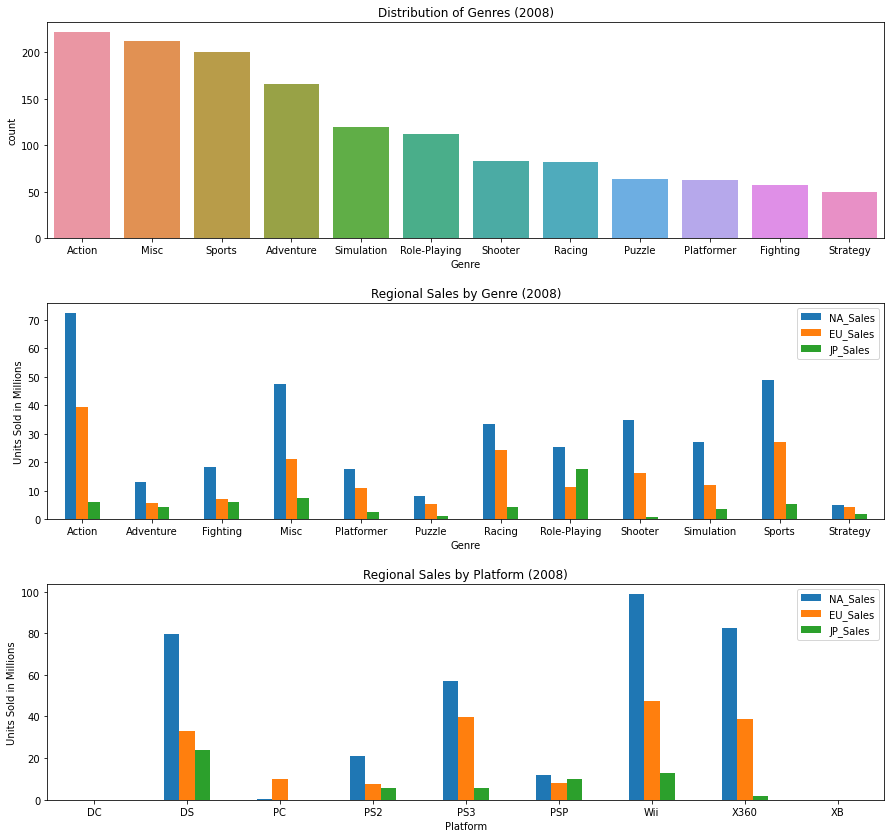

In [36]:
_, axs = plt.subplots(3, 1, figsize=(15, 18))
plt.subplots_adjust(top = 0.7, bottom=0.1, hspace=0.3)

_ = axs[0].set_title('Distribution of Genres (2008)')
_ = axs[0].set_ylabel('Count')
_ = axs[0].set_xlabel('Genre')
_ = sns.countplot(x='Genre', data=df_2008, order= df_2008['Genre'].value_counts().index, ax=axs[0])

data = df_2008.groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = data.plot(ax=axs[1], kind='bar')
_ = axs[1].set_title("Regional Sales by Genre (2008)")
_ = axs[1].set_ylabel("Units Sold in Millions")
_ = axs[1].set_xticklabels(labels=data.index, rotation=0)

data = df_2008.groupby(by='Platform')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = data.plot(ax=axs[2], kind='bar')
_ = axs[2].set_title('Regional Sales by Platform (2008)')
_ = axs[2].set_ylabel('Units Sold in Millions')
_ = axs[2].set_xticklabels(labels=data.index, rotation=0)

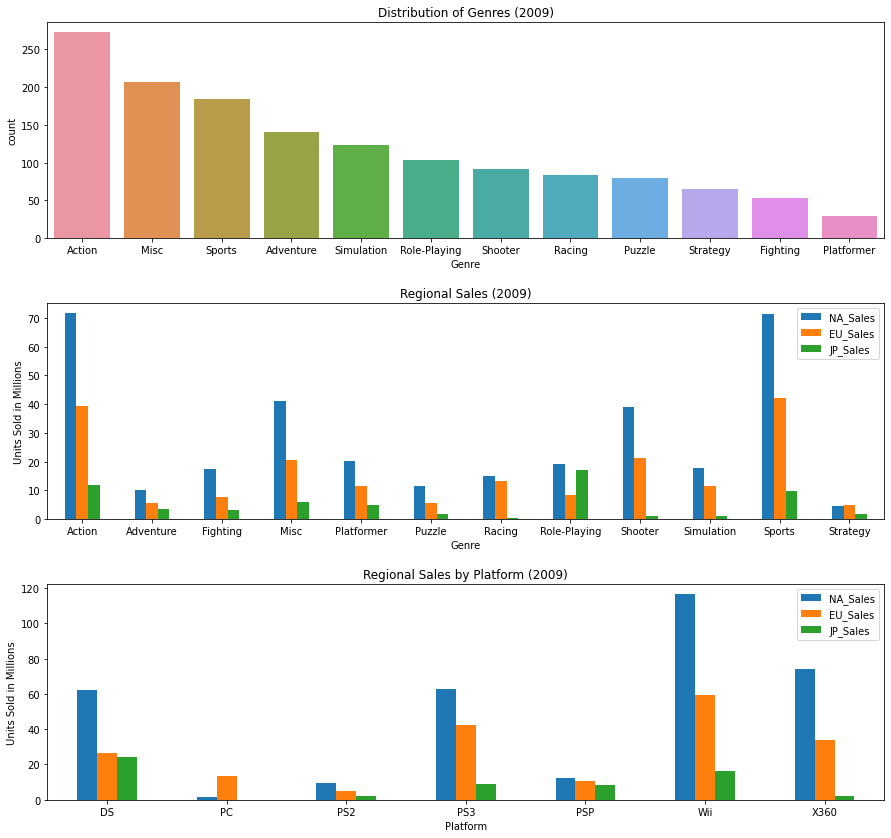

In [37]:
_, axs = plt.subplots(3, 1, figsize=(15, 18))
plt.subplots_adjust(top = 0.7, bottom=0.1, hspace=0.3)

_ = axs[0].set_title('Distribution of Genres (2009)')
_ = axs[0].set_ylabel('Count')
_ = axs[0].set_xlabel('Genre')
_ = sns.countplot(x='Genre', data=df_2009, order= df_2009['Genre'].value_counts().index, ax=axs[0])

data = df_2009.groupby(by='Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = data.plot(ax=axs[1], kind='bar')
_ = axs[1].set_title('Regional Sales (2009)')
_ = axs[1].set_ylabel('Units Sold in Millions')
_ = axs[1].set_xticklabels(labels=data.index, rotation=0)

data = df_2009.groupby(by='Platform')[['NA_Sales','EU_Sales','JP_Sales']].sum()
_ = data.plot(ax=axs[2], kind='bar')
_ = axs[2].set_title('Regional Sales by Platform (2009)')
_ = axs[2].set_ylabel('Units Sold in Millions')
_ = axs[2].set_xticklabels(labels=data.index, rotation=0)

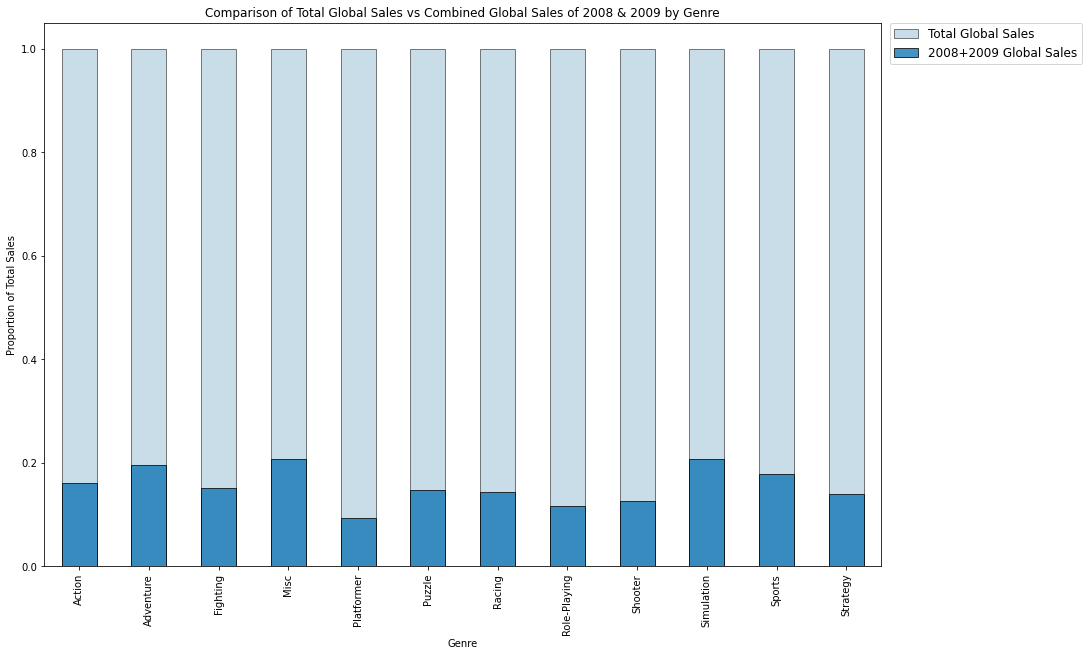

In [38]:
ax = (df.groupby(by='Genre')['Global_Sales'].sum()/df.groupby(by='Genre')['Global_Sales'].sum()).plot.bar(stacked=True,color = '#95bcd4', alpha=0.5,edgecolor='black')
((df_2008.groupby(by='Genre')['Global_Sales'].sum()+(df_2009.groupby(by='Genre')['Global_Sales'].sum()))/df.groupby(by='Genre')['Global_Sales'].sum()).plot.bar(stacked=True,color = '#0870b0', alpha=0.75,edgecolor='black')
fig = plt.gcf()
ax.set_title('Comparison of Total Global Sales vs Combined Global Sales of 2008 & 2009 by Genre')
ax.set_ylabel('Proportion of Total Sales')
fig.set_size_inches (15,10)
ax.legend(['Total Global Sales', '2008+2009 Global Sales'],bbox_to_anchor=(1.01,1), loc=2, borderaxespad=0., fontsize='12')

The visualizations above account for various analyses looking specifically at the years 2008 and 2009 in terms of our focus of research. When observing the total releases across each year, it was clear that the most significant peak occurred across the span of these two years, and we were curious as to how the rest of the data may look. 

The first visualizations in each section break down the total number of genres released respectively. Each year following very similar trends, and the action genre leading in releases.

The subsequent bar graphs each breakdown regional sales respectively, again the two years follow very similar trends in overall sales. Action, sports, and misc genre games performing the best in each year, however sports games had a significant

The third set of graphs identify the regional sales across each platform within this time frame. While 2008 had greater sales for the Xbox360 and DS, 2009 appeared to have a higher number of overall sales particularly for the Wii. 

The final graph directly above illustrates the cumulative proportion of global sales across these two years (2008, 2009) when compared to the total amount of global sales using a stacked bar graph. On average the sales within these two years makes up a significant portion of total sales at roughly 15% on across each genre, the highest being about 21% between 'Simulation' and 'Misc'. 

# Ethics & Privacy

The data set that we gathered from Kaggle is an unbiased source. As stated on the Kaggle page, it was scraped from [vgchartz.com](http://vgchartz.com). According to their website, they publish "video game hardware estimates every week and host an ever-expanding game database with over 55,000 titles listed, featuring up-to-date shipment information and legacy sales data." That being said, VGChartz is a reliable source that aims to provide unbiased data. As this is a public accessible website there is no personal information exposed that could warrant privacy concerns. We made sure to comply with any terms and conditions stated in the website regarding privacy policies.

The video game sales dataset explores number of sales but do not reveal information of the customers nor the stores operating the sales. This is important due to the fact that the data retains anonymity of people. One bias that could potentially affect our data is if a particular publisher doesn’t report their data on stores causing a discrepancy in our data analysis. However, the dataset only includes sales greater than 100,000 copies. As stated, our data only portrays the sales of video games around the world and doesn’t attribute to revealing personal information regarding individual’s identities.

Our information consists of public game information. Since our project revolves around games, it was purely done for entertainment and educational purposes to inform those who might have been interested in learning about potential regions' biases towards a specific genre. Video games have been around for about 50 years, so it is facinating to be able to visually display the evolution of it. The best we can do is be transparent about all findings and emphasize aspects of our research such as the scope, biases, and where the information was gathered so the viewer can judge for themselves the validity of our work.

# Conclusion & Discussion

Considering the results of our analysis above, our initial hypothesis of predicting genre preference across regions was correct. Focusing on the peak of our data around the years of 2008 and 2009 (where videogames saw significant increases in both overall releases and sales), we do in fact observe Role-Playing games having the highest relative sales in Japan, while Action and Sports games are the top performers within North America and Europe. Our findings also support this notion in observing the top selling game within the scope of our dataset across regions. In Japan this was in fact a Role-Playing game, Pokemon Red/Blue (1996), while both North America and Europe shared the top position with the Sports game, Wii Sports (2006). We can therefore confidently conclude that there does in fact appear to be distinct regional preferences to specific genre of video games according to our data.

However, there were potential limitations to our approach, as looking past genre alone our data presented interesting results when including the variable of publisher. As explained above through visualizations ranking the publishers as well as the individual breakdown of Nintendo's global sales in itself -- it was quite clear that Nintendo more than anything appeared to be driving a large proportion of global sales of video games. It would be remiss to neglect the effect of this publisher on shaping the sales of videogames across all regions as a whole. As referring back to the top five selling games: 14/15 (93%) belonged to Nintendo. Since our focus was on genre preference across regions, there may be other notable factors not fully considered. Likewise another limitation of note in regards to our dataset was its inclusion of only physical units sold, which translates poorly into the sale of video games becoming increasingly digital via downloads. We predict this likely had an effect on the overall downward trend observed of sales and releases within recent years. While we do not believe these limitations significantly impact our results, they offer room for further consideration into expanding upon other areas of interest. 

# Team Contributions

Throughout the quarter, we made sure to consistently meet over Discord to discuss project related progress. By conducting these meetings, we not only were able to make headway as a group but we were also able to hold every group member accountable. The weekly meetings also helped in communicating expectations for the weeks to come, which in turn helped us to divide and space out the work in a fair and timely manner. When it came to communication outside of the Discord meetings, every group member was easily accessible and quick to respond whenever a question or problem arose regarding the checkpoints and the final project.  It was the culmination of everybody working together throughout the quarter that made it so that the load was not carried by one person but was rather divided evenly among the group.